# Attendance

[The link to SEAts](https://goldsmithscollege.sharepoint.com/sites/intranet-supporting-students/SitePages/SEAtS--QR-codes-for-check-in.aspx?utm_campaign=SEAtS%20reminder%2027.09.22&utm_source=emailCampaign&utm_content=&utm_medium=email)

Announcement: added examples of previous outstanding CW1 submissions on the VLE!

---

# 5. Fundamentals of machine learning

## 5.1 Generalisation: The goal of machine learning

In [1]:
import os
import numpy as np
# we need more than the default 75 below
np.set_printoptions(linewidth=100)

import matplotlib.pyplot as plt
plt.rcParams['lines.markersize'] = 3  # nice scatter point size

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # mute some annoying warnings

from IPython.display import YouTubeVideo

The fundamental tension of learning:
- *Optimization*: fit **training** data as closely as possible;
- *Generalisation*: perform on **unseen** data as best as possible.


---

## Overfitting, *again*!


<!-- ![Chollet canonical overfitting](images/chollet.canonical-overfitting.png) -->
<img src="https://drive.google.com/uc?id=1om4_X7zKPLEsmPxXZ0GHfu9foQsse2rN">

<small>DLWP, p.122</small>

An nice, accessible summary: [Santiago bias/variance tradeoff, Twitter](https://twitter.com/svpino/status/1584515105374339073?t=cYoz1-lqowkiDkOrac65Nw).

If we think about this in abstract terms, if we want our model to generalise, it needs not to take into account **every single detail** in the training data.

Because these are the things are that may not be present in unseen data.

We want our model to produce **an abstract/underlying representation** of the data, not rote learn it.

<!-- ![Chollet outliers](images/chollet.overfitting-outliers.png) -->
<img src="https://drive.google.com/uc?id=1iygxZPrGhU1fhtlYT0Tl0CioJ0TtvpXd">


<small>DLWP, p.124</small>

The green line learns the underlying border between classes, discarding the fine-grained detail and noise in the area of uncertainty.

<!-- ![Chollet ambiguous](images/chollet.overfitting-ambiguous.png) -->
<img src="https://drive.google.com/uc?id=1eF817ShqfRQMvLLuHlzLR98eJFi29Urc">

<small>DLWP, p.124</small>

### Noisy training data / Ambiguous features

Datasets can contain errors.

But also, data can be *intrinsically* ambiguous!

For instance, sometimes a hand-written 7 can be really close to a 1!

<!-- ![Chollet noisy data](images/chollet.noisy-data.png) -->
<img src="https://drive.google.com/uc?id=1lx7CvffhGXA6HfWbglmC7UrNZHh521pk">


<small>DLWP, p.123</small>

<!-- ![Chollet mislabeled data](images/chollet.mislabeled-data.png) -->
<img src="https://drive.google.com/uc?id=19noIlH0rP2-75JWlk1QJjyRus8wOWInG">


<small>DLWP, p.123</small>

### Rare features and spurious correlations

One other danger is to **think certain features are correlated when they are not**, you simply have never seen data that contradicts your assumption.

*Example: you've known two orange tabby cats, they were antisocial. You think all orange tabby cats are, even if they are not.* DLWP, p.125.


<a href="https://twitter.com/fchollet/status/1585640324948406275?t=8r0T5VGcy5RZ_xF1L6_5Xw&s=03">
<!--     <img style="float:right" src="images/chollet.overfitting-ikea.png"> -->
    <img style="float:right" src="https://drive.google.com/uc?id=1NX5hGvz9Yp_HClzeO_nJ00Yp3Po-NvSo
">
</a>

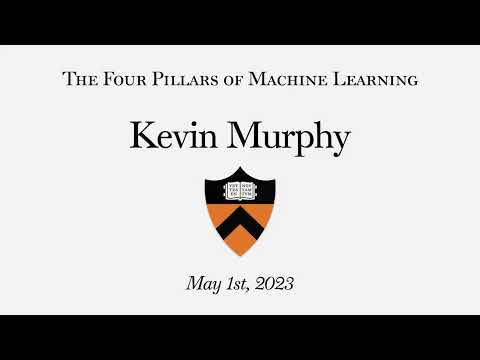

In [9]:
YouTubeVideo('uhcdw5rvqqE', width=853, height=480, start=794) # Kevin Murphy, The Four Pillars of Machine Learning, until 15'10

As an experiment, we can add 784 noise dimension to MNIST images and see the result.

In [48]:
(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)                 # ↑ ADDING RANDOM FEATURES (same size as the samples)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)                 # ↑ ADDING ZEROS (EMPTY) FEATURES (same size as the samples)

In [11]:
def get_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [12]:
# training original dataset
model = get_model()
history_orig = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2 # ← NOTE: Keras is so nice you can even ask it to set aside validation data for you...
)
del model

Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 0.2885 - accuracy: 0.9168 - val_loss: 0.1521 - val_accuracy: 0.9541
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1184 - accuracy: 0.9652 - val_loss: 0.1047 - val_accuracy: 0.9679
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0769 - accuracy: 0.9779 - val_loss: 0.0974 - val_accuracy: 0.9706
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0551 - accuracy: 0.9838 - val_loss: 0.0790 - val_accuracy: 0.9767
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0415 - accuracy: 0.9877 - val_loss: 0.0822 - val_accuracy: 0.9758
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0309 - accuracy: 0.9910 - val_loss: 0.0872 - val_accuracy: 0.9751
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0231 - accuracy: 0.9934 - val_loss: 0.0748 - val_accuracy: 0.9789
Epoch 

In [13]:
# training with noise
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)
del model

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6238 - accuracy: 0.8110 - val_loss: 0.3459 - val_accuracy: 0.8907
Epoch 2/10
375/375 [==============================] - 2s 7ms/step - loss: 0.2503 - accuracy: 0.9226 - val_loss: 0.1788 - val_accuracy: 0.9498
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1627 - accuracy: 0.9504 - val_loss: 0.1596 - val_accuracy: 0.9532
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1151 - accuracy: 0.9640 - val_loss: 0.1237 - val_accuracy: 0.9634
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0843 - accuracy: 0.9733 - val_loss: 0.1331 - val_accuracy: 0.9605
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0633 - accuracy: 0.9798 - val_loss: 0.1209 - val_accuracy: 0.9682
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0473 - accuracy: 0.9848 - val_loss: 0.1130 - val_accuracy: 0.9683
Epoch 

In [14]:
# training with zeros
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)
del model

Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 0.2883 - accuracy: 0.9156 - val_loss: 0.1492 - val_accuracy: 0.9563
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1197 - accuracy: 0.9647 - val_loss: 0.1107 - val_accuracy: 0.9672
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0787 - accuracy: 0.9768 - val_loss: 0.0880 - val_accuracy: 0.9735
Epoch 4/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0559 - accuracy: 0.9836 - val_loss: 0.0812 - val_accuracy: 0.9762
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0429 - accuracy: 0.9876 - val_loss: 0.0856 - val_accuracy: 0.9747
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0313 - accuracy: 0.9911 - val_loss: 0.0831 - val_accuracy: 0.9771
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0240 - accuracy: 0.9930 - val_loss: 0.0829 - val_accuracy: 0.9785
Epoch 

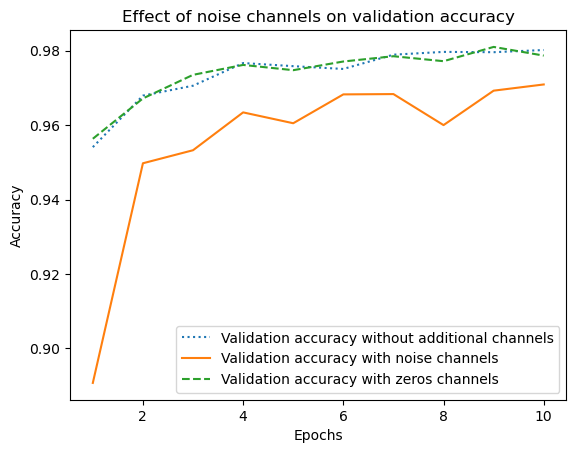

In [17]:
val_acc_orig = history_orig.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_orig, ":", label="Validation accuracy without additional channels")
plt.plot(epochs, val_acc_noise, "-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Almost one percentage point lower validation accuracy for the noisy model despite the same information in both cases!

*The more noise channels you add, the further accuracy will degrade.* (DLWP, p.126)

The model **fits the noise** (another way of seeing overfitting).

---

##  5.1.2 The nature of generalisation in deep learning

A remarkable fact about deep learning models is that **they can be trained to fit anything**, as long as they have enough representational power.

For example, you can shuffle the MNIST labels and train on that! 

In [6]:
random_train_labels = train_labels[:]  # [:] is a nice way to guarantee you are making a copy
np.random.shuffle(random_train_labels) # shuffle the labels

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    train_images, random_train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)
del model, train_images_with_noise_channels, train_images_with_zeros_channels

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3171 - accuracy: 0.1035 - val_loss: 2.3082 - val_accuracy: 0.1071
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3002 - accuracy: 0.1169 - val_loss: 2.3114 - val_accuracy: 0.1052
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 2.2910 - accuracy: 0.1279 - val_loss: 2.3171 - val_accuracy: 0.1037
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 2.2770 - accuracy: 0.1409 - val_loss: 2.3291 - val_accuracy: 0.1026
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 2.2597 - accuracy: 0.1546 - val_loss: 2.3435 - val_accuracy: 0.1013
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 2.2386 - accuracy: 0.1684 - val_loss: 2.3532 - val_accuracy: 0.0981
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 2.2136 - accuracy: 0.1840 - val_loss: 2.3637 - val_accuracy: 0.1026
Epoch 

If you do that, you find that:

- the **loss** *still* goes down (although learning is far easier when the labels are meaningful)
- the **validation loss** tends to diverge, and certainly does not go down!
- your **validation accuracy** will be, in our case, around 0.1: *random guessing*!

But this is a fascinating phenomenon: you can generate random data points and labels, and your network **will** learn them.

So, how come networks *do* learn something and generalise?

### The manifold hypothesis

#### Manifolds

**Manifold** is the topological generalisation of a surface (like tensors with vectors and matrices).

Technically: a manifold **locally resembles Euclidean space near each point** ([Wikipedia](https://en.wikipedia.org/wiki/Manifold)). 

The Earth's surface looks flat from our (sufficiently local) perspective.

A line is an example of a 1D manifold. A plane, but also the surface of a sphere, or a torus (doughnut), are all 2D manifolds. And of course this doesn't stop there, this works in any dimension.

<!-- ![Brian Keng circle manifold](images/bjlkeng.manifold-circle.png) -->
<img src="https://drive.google.com/uc?id=1FT8MwWcqZdGCwD67AV0obAcJp2OGcHwQ">

"A circle is a one-dimensional manifold embedded in two dimensions where each arc of the circle locally resembles a line segment."  
<small>Source: [Brian Keng, "Manifolds: A Gentle Introduction"](https://bjlkeng.github.io/posts/manifolds/), itself taken from: [Manifold, Wikipedia](https://en.wikipedia.org/wiki/Manifold#Circle)</small>

The idea comes from the fact that our data is **highly structured**.

Our network can learn that structure, instead of, as said, *rote-learning*/*memorising* the data.

We are not at all learning **all possible 28x28 images** ($255^{784}\ \text{possibilities!}$), only a tiny subset (see the [nice discussion here](https://youtu.be/?si=yuWROx6u9-X8A6su&t=2954)).

You can easily imagine that *most* possible images are not MNIST digits...

What is more, we can make the *hypothesis* that the subset of digits is in fact a **manifold** within the space of possible 28 x 28 `uint8` arrays.

If the space of MNIST digits is a manifold:
- it is **continuous**: if you modify a sample a little, it is still recognisable;
- all as samples are **connected** (you can travel from one to the other without jumps).

What does this mean for us? 
- Machine learning models only have to fit **relatively simple, low-dimensional, highly structured subspaces** within their potential input space (latent manifolds).
- Within one of these manifolds, it’s always possible to **interpolate between two inputs**, that is to say, morph one into another via a continuous path along which all points are still valid points, still on the manifold (MNIST digits).

<!-- ![Chollet MNIST morphing](images/chollet.mnist-morphing.png) -->
<img src="https://drive.google.com/uc?id=1QjxnBhlyImpRa_c7iBS8kRMC--Wvhw8k">

<small>DLWP, p.129</small>

### Interpolation as a source of generalisation

So, if you have been able to learn that manifold, you can start making sense of points you’ve never seen before by **relating them to other points that lie close on the manifold**.

You can make sense of the **totality** of the space using only a **sample** of the space.

<!-- ![Chollet ](images/chollet.manifold-linear-interpolation.png) -->
<img src="https://drive.google.com/uc?id=16O26uhlbpwJ7VxnevwsonUxjodJkf7nt">


<small>DLWP, p.130</small>

However, one should remember this is only *one* aspect of generalisation.

The tip of the iceberg, and only working for *close* points: **local generalisation**.

In Chollet's theory, humans are capable of much more: **extreme generalisation**.

##### Reference

[Chollet, "On the Measure of Intelligence", arXiv](https://arxiv.org/abs/1911.01547) (detailed video discussion [here](https://www.youtube.com/watch?v=3_qGrmD6iQY), [here](https://www.youtube.com/watch?v=THcuTJbeD34), [here](https://www.youtube.com/watch?v=cuyM63ugsxI) and [here](https://www.youtube.com/watch?v=O9kFX33nUcU)).

### Why deep learning works

A deep learning model is basically: 
- a sheet of paper is a 2D manifold in 3D: as the net learns, the curve is fitted to data points, **uncrumpling** the sheet;
- a very high-dimensional curve that is smooth and continuous, (required for gradient descent);
- you can also see it as **finding the appropriate projection** of the data into the structured space (the manifold).

<!-- <img style="height:250px;float:right" src="images/chollet.uncrumpling.png"> -->
<img style="height:250px;float:right" src="https://drive.google.com/uc?id=1wh0tVygPjTu1e_pDCUMNf4pKb20FAqmx">


<small style="position:absolute;right:0;bottom:0">DLWP, p.130</small>

<!-- ![Chollet training intermediate state](images/chollet.overfitting-training-intermediate.png) --> 
<!-- <img  style="height:650"  src="https://drive.google.com/uc?id=1iqXBR3Ntm2BG2dZ_HDhG11U-KJVP2iKE"> -->
<!-- <small>DLWP, p.131</small> -->

### Training data is paramount

The more data you train on, the better you can fit!

<!-- <img  style="height:550px;float:right" src="images/chollet.generalization-dense-sampling.png"> -->
<img  style="height:600px;float:right" src="https://drive.google.com/uc?id=18waKFQNNJDEr35nIPimGdxe4-9m-18AK">


<small  style="position:absolute;right:0;bottom:0">DLWP, p.132</small>

### The Curse of Dimensionality

The [**curse of dimensionality**](https://en.wikipedia.org/wiki/Curse_of_dimensionality) is actually one of the real challenges in Deep Learning.

When your data is distributed in a very high-dimensional space, data points have barely **any neighbours**.

The space is very **sparse** (very few data points compared to all possibilities).

That is because **one dimension is enough** for two points to be far apart.

*Example: MNIST images. 784 pixels, each indpendent of each other, thus considered the __dimensions__ of the space of possible images. What are the chances that, given two images of a number, __all__ pixel values are really close to each other (↔ the coordinates of the two images are close)?*

In [7]:
def plot_distant_points():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    p1 = (6,5,0)   # the two points are very close in the two first dims
    p2 = (5,6,10)  # but one dimension is enough to draw them apart

    p12 = (6,5,10)   # the two points are very close in the two first dims
    p22 = (5,6,0)   # the two points are very close in the two first dims

    ax.set_xlim([0,12])
    ax.set_ylim([0,12])
    ax.set_zlim([0,12])

    ax.scatter(*p1, marker='o', c='b', s=100, label=f"Point 1:  {p1}")
    ax.scatter(*p2, marker='x', c='b', s=100, label=f"Point 2:  {p2}")

    ax.scatter(*p12, marker='o', c='coral', label=f"Point 1': {p12}")
    ax.scatter(*p22, marker='x', c='coral', label=f"Point 2': {p22}")

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.legend()
    plt.show()    

A 3D example. Two points are close to each other in the first two dimensions, but the third dimension sets them apart. What is the chance for two points to be close if there are 784 dimensions?

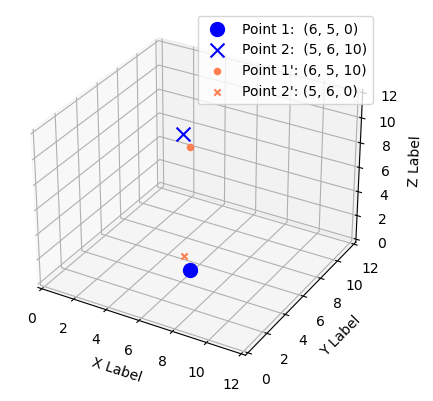

In [8]:
plot_distant_points()

---

## 5.2 Evaluating machine-learning models

## 5.2.1 Training, validation, and test sets

### Recap

Models are not evaluated on their training data because we want **generalisation** – the ability to make good predictions on new, unseen data.

Predictive power on unseen data can **worsen** even though the fit to training data **improves**.

We need stategies to limit overfitting and maximise generalisation.

Remember, the reason we use a **validation set** on top of our **test set** is:

We wish to find good **hyperparameter** settings!

Hyperparameters are tuned by considering their effect on a validation set.

**We** inject into our model information about that validation set every time a hyperparameter is tuned.

The more experiments we perform, the more information from that set **leaks** into our model.


Thus, we cannot possibly consider the validation set **unseen data**.

At the end of the tuning process, the model is actually optimised for the validation set.

And generalisation can still be checked by evaluating our model on our **(unseen) test data**.

<!-- <img style="height:300px;float:right" src="images/select-best-model.png"> -->
<img style="height:300px;float:right" src="https://drive.google.com/uc?id=13ttRZ3FTbpbcsb86SAGrB8PvTGc2BHYe">

<small style="position:absolute;right:0;bottom:0">["Training, Validation and Test sets 차이 및 정확한 용도 (훈련, 검정, 테스트 데이터 차이)"](https://modern-manual.tistory.com/m/19)</small>

## Three validation techniques

- #### Simple hold-out validation
- #### K-fold validation
- #### Iterated K-fold validation with shuffling 

### 1. Simple hold-out validation

Basic setup (common in big data settings):

<!-- <img style="height:350px;float:right" src="images/chollet.simple-holdout-validation.png"> -->
<img style="height:350px;float:left" src="https://drive.google.com/uc?id=1VrW0-HNVGTViKgFdwYnR-Hb82U2ugcY4">
<small  style="position:absolute;left:0;bottom:0">DLWP, p.134</small>


Our setup (theoretically better!):


<!-- <img style="height:300px;float:right" src="images/training-validation-test.png"> -->
<img  style="height:300px;float:right" src="https://drive.google.com/uc?id=1aFnU_8fzL7mJBkyG9dgSx-VFovuD-jnM">

<small style="position:absolute;right:0;bottom:0">["Training, Validation and Test sets 차이 및 정확한 용도 (훈련, 검정, 테스트 데이터 차이)"](https://modern-manual.tistory.com/m/19)</small>

Note that even the second technique is vulnerable to statistical fluctuation if the validation and test set are small.

You can notice this if different rounds of **shuffling** yield **validation variance** (= validation results are very variable).

### 2. K-fold validation

What we've seen last time, see the previous notebooks for the code.

<!-- <img  style="float:right"  src="images/chollet.k-fold.png"> -->
<img  style="float:right"  src="https://drive.google.com/uc?id=10J1hrWK1PJbsZsMvOfEFdm0G3Gl6pzw5">


<small style="position:absolute;right:0;bottom:0">DLWP, p.135</small>

### 3. Iterated K-fold validation with shuffling

In a variant known as **iterated** or **repeated** K-fold validation, K-fold validation is repeated $P$ times.

Each time, the dataset is shuffled, leading to different partial training and validation sets!

The K-fold averages are gathered and re-averaged.

$P \times K$ models are trained and evaluated – this is expensive!

```python
iterated_val_scores = []
             # ↓ repeat P times
for _ in range(P):      # ↓ shuffle train and validation sets         
    train_val_dataset = np.shuffle(train_val_dataset)
                        # ↓ do K-fold validation (trains K-models!)
    k_fold_val_scores = k_fold_validation(train_val_dataset)
                               # ↓ save the mean this round of K-fold validation
    iterated_val_scores.append(np.mean(k_fold_val_scores))
# the iterated average is the mean of the P K-fold score means
avg_iterated_age_val_score = np.mean(iterated_val_scores)  
```

This method is useful when **little** data is available.

In more and more deep learning contexts, we are dealing with **heaps** of data!   

K-fold is then both too expensive and not relevant...

---

## 5.2.2 Beating a common-sense baseline

Because deep learning is somewhat opaque, it is important to have an idea of what simpler methods achieve.

The simplest of all methods is a random classifier: just **a random guess**.

The second most simple: only predict **the most prevalent class**.

*If your dataset has 90% of class A, and 10% of class B, a model that **always** predicts A will get .9 accuracy, you need to beat that!*

---

## 5.2.3 Things to keep in mind about model evaluation

### The training and test data should be representative

- Train set, validation set *and* test set  must come **from the same distribution**;
- That mean: they **must contain a bit of everything**.


_For example, suppose in the MNIST problem that the images come sorted by digit. Clearly, the test set and training sets will contain different classes, not good! This is easily remedied by **shuffling**._

### The arrow of time

- Don't shuffle time-ordered data (e.g. weather and stock prediction)!
- Make sure the training does not allow your model to just cheat and look up the solutions (causality/look ahead).

### Avoid data redundancy (as much as possible):

- A data point not uncommonly occurs twice or more in real world data;
- The risk is doing testing on data that was present in the training set;
- **Ideally**, you have to ensure that the training and test sets are **disjoint**.

*Good luck if you train on the entire Internet...  (⇀‸↼‶)*

---

## 5.3 Improving model fit

One side of our problem is **not being able to fit** the data (we don't really encouter that here, but for larger datasets that will happen).

Then, what we want is **increasing the power (capacity)** of our model.

## 5.3.3 Increasing model capacity

Let's compare two models and their respective performance.

In [51]:
tf.keras.backend.clear_session()
batch_size = 128

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="softmax") # ← ONE LAYER
])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=batch_size,
    validation_split=0.2
)
del model

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.6747 - accuracy: 0.8349 - val_loss: 0.3597 - val_accuracy: 0.9015
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3515 - accuracy: 0.9033 - val_loss: 0.3065 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3153 - accuracy: 0.9124 - val_loss: 0.2902 - val_accuracy: 0.9168
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2990 - accuracy: 0.9161 - val_loss: 0.2803 - val_accuracy: 0.9230
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2894 - accuracy: 0.9183 - val_loss: 0.2746 - val_accuracy: 0.9246
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2830 - accuracy: 0.9211 - val_loss: 0.2714 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2782 - accuracy: 0.9224 - val_loss: 0.2689 - val_accuracy: 0.9258
Epoch 

In [52]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(96, activation="relu"),    # ← THREE LAYERS, more neurons
    tf.keras.layers.Dense(96, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=batch_size,
    validation_split=0.2
)
del model

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 0.3691 - accuracy: 0.8959 - val_loss: 0.1969 - val_accuracy: 0.9433
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1647 - accuracy: 0.9506 - val_loss: 0.1393 - val_accuracy: 0.9578
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1154 - accuracy: 0.9656 - val_loss: 0.1335 - val_accuracy: 0.9599
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0884 - accuracy: 0.9735 - val_loss: 0.1048 - val_accuracy: 0.9694
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0699 - accuracy: 0.9789 - val_loss: 0.0997 - val_accuracy: 0.9716
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0576 - accuracy: 0.9832 - val_loss: 0.0933 - val_accuracy: 0.9725
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.1015 - val_accuracy: 0.9703
Epoch 

In [54]:
def plot_two_losses(losses1, losses2, epochs=range(1,21), share_axes=False):
    if share_axes:
        fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, constrained_layout=True, sharex=True, sharey=True, figsize=(10,4))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, constrained_layout=True, figsize=(10,4))
    
    ax1.plot(epochs, losses1, "b--", label="Validation loss small")
    ax1.set_title("Effect of insufficient model capacity on validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    ax2.plot(epochs, losses2, "r--", label="Validation loss large")
    ax2.set_title("Effect of sufficient model capacity on validation loss")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Loss")
    ax2.legend()
    plt.show()

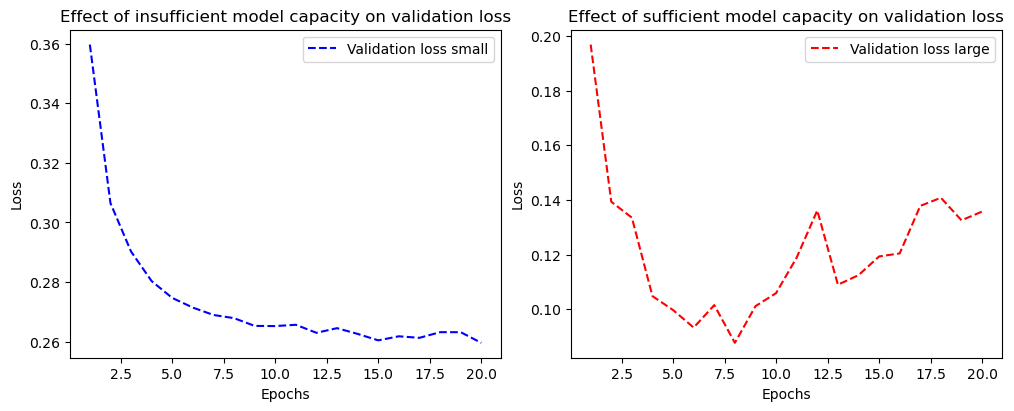

In [55]:
val_loss_small = history_small_model.history["val_loss"]
val_loss_large = history_large_model.history["val_loss"]
plot_two_losses(val_loss_small, val_loss_large)

#### Note

**Never** forget to keep the scales of the axes in mind! What we saw is a reproduction of what you find in DLWP, 141-2. However, if you force the axes to be at the same scale, the picture is somewhat different: you clearly see the insufficient capacity model stagnating, but your overfitting model is **overall better**! (You would need to train it longer to degrade the validation loss beyond what the simpler model does.)

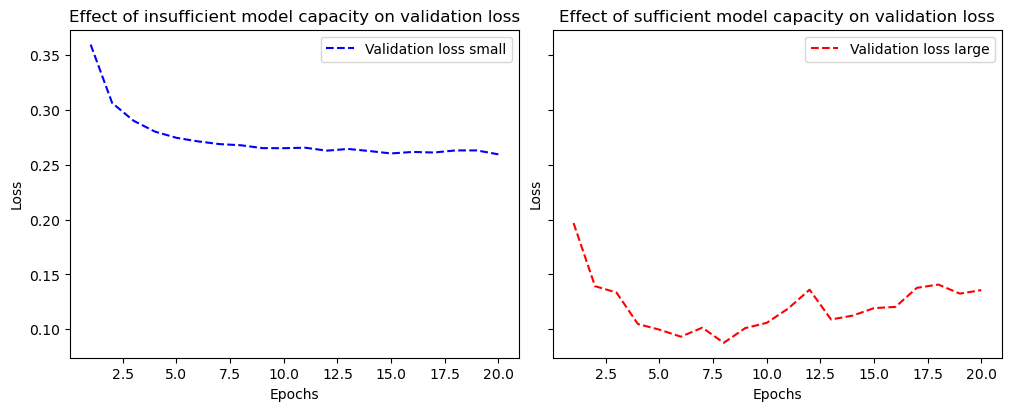

In [56]:
val_loss_small = history_small_model.history["val_loss"]
val_loss_large = history_large_model.history["val_loss"]
plot_two_losses(val_loss_small, val_loss_large, share_axes=True)

In [57]:
del train_images, train_labels

---

## 5.4 Improving generalisation

Once we are able to overfit, we want to make sure our gains will **remain valid on unseen data**.

That's the other side of our problem.

What we aim for is a *middle ground* between performing on known *and* unknown data!

## 5.4.1 Dataset curation


- **More data is better!** Make sure you have enough data.
- Minimize labeling errors: visualize your inputs to check for anomalies, and proofread your labels.  
  **Knowing your data well will help you!**
- Clean your data and deal with missing values.  
  (Beware! Real data in production might not be clean... → not the same distribution!)
- Look at your **features**, remove useless ones if necessary.

## 5.4.2 Feature engineering

Feature engineering is data preprocessing in the light of human knowledge of the data and the workings of a neural network.

Feature engineering was critical pre-DL since shallow networks do not have a large hypothesis space.

DL networks, thanks to their large hypothesis space, are less dependent on feature engineering.

Feature engineering can still relevant because it helps us to solve problems cheaply and elegantly and with less data.

The smaller the training set, the greater the need for feature engineering.

The opposite is usually true: **if you work at scale, feature engineering tends to lose out**.

### Example: learning to tell the time

- suppose the input data is a pixel map of a clock face;

- this is a difficult machine learning task;

- requires convolutional nets and a vast data set of clock faces.

- Feature engineering might extract the x, y coordinates of the hands;

- the problem then becomes tractable;

- in fact the problem can be solved by a formula – the angle of the hands.

<!-- ![Chollet features time](images/chollet.features-time.png) -->
<img src="https://drive.google.com/uc?id=1BzlLSZUCFEYLohQtBwkdZYFxmNn61CkI">


<small>DLWP, p.143</small>

---

## 5.4.3 Using early stopping

Deep learning models are most of the time (very) **overparameterised**.

They have way more parameters (degrees of freedom) than what is needed to fit the data.

This is not a problem, as we *don't fit the data perfectly*.

---

## 5.4.4 Regularising your model

Our experience with classification of movie reviews and newswires shows that model performance on validation data peaks and then decreases with training.

Because of this, we seek a balance between 
- **optimisation** (of training data) and 
- **generalisation** (to test data).

### More Is More

Often the easiest, and almost always the best remedy to overfitting is to find **more training data**.

#### Note

*We need solutions for when the data is limited. (；⌣̀_⌣́ )*

#### Note

More data won't help you if you **underfit**!

### Three other regularisation techniques

- #### network size reduction
- #### weight regularisation
- #### dropout

### 1. Reducing the network’s size

Network **capacity** is simply the number of learnable  parameters (weight and bias parameters).

Between a low capacity model, likely to **underfit** our training data, and a high capacity one, that **fits the training data perfectly and fails to generalise**, there might be one that is just right!

The goal is a model with *sufficient but limited* capacity.

Such a model will be forced to learn **compressed representations** (the **underlying manifold**) – which then gives it predictive power.

The ideal number of layers and number of units in each layer is unknowable in advance .

#### Workflow

- Start with a low capacity model and 
- increase capacity until validation gains flatten out.

Let's compare a small and a large network to the original IMDB network.

A three layer model building function. Two `relu` layers followed by a `sigmoid` layer for the output of a probability.

In [2]:
def build_model(layer_1_units, layer_2_units, layer_3_units, clear=True):
    if clear: # O gods of GPU memory, have mercy upon us
        tf.keras.backend.clear_session()
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(layer_1_units, activation='relu', input_shape=(10000,)))
    model.add(tf.keras.layers.Dense(layer_2_units, activation='relu'))
    model.add(tf.keras.layers.Dense(layer_3_units, activation='sigmoid'))
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc']
    )
    return model

The original network. 160,305 trainable parameters.

In [14]:
model = build_model(16, 16, 1)
model.summary()
del model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


A small (low capacity) network with about one quarter the capacity of the original network.

In [15]:
model = build_model(4, 4, 1)
model.summary()
del model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 40004     
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


A larger (high capacity) network – 32 times original capacity.

In [16]:
model = build_model(512, 512, 1)
model.summary()
del model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120512   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
((train_data, train_labels), (test_data, test_labels)) = tf.keras.datasets.imdb.load_data(num_words = 10000)

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### A nice callback

The same as last time.

See this [tutorial](https://www.tensorflow.org/guide/keras/custom_callback) for more.

In [3]:
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):                                            # by passing epochs at initialization
        super(tf.keras.callbacks.Callback, self).__init__()                # I can use this as our total in on_epoch_begin
        self.epochs = epochs
    def on_epoch_begin(self, epoch, logs=None):                            # run at the start of each epoch
        c = ['|', '/', '-', '\\'] 
        print(f"\r{c[epoch % 4]} epoch: {epoch+1}/{self.epochs}", end="")  # run at the very end of training
    def on_train_end(self, logs=None):
        print()

### Modular programming: a loop for building and training three networks

The networks are named according to the number of units in each layer and the histories are saved in a dictionary. The progress spinner rotates slowly on the large network because there are many more parameters to train in each epoch. 

In [5]:
histories = {}
for i in [4, 16, 512]:
    model = build_model(i, i, 1)                      # 1. Build models:
    model_name = f"{i}-{i}-1"                         # '4-4-1', '16-16-1', '512-512-1'
    print('Training', model_name)
    history = model.fit(                              # 2. Train & validation
        x_train,
        y_train,
        epochs=20,
        batch_size=512,
        validation_split=0.4,
        verbose=0,
        callbacks=[CustomCallback(20)]                # ← same lovely callback as last time
    )
    histories[model_name] = history                   # 3. Save history in a dictionary
    del model

Training 4-4-1
\ epoch: 20/20
Training 16-16-1
\ epoch: 20/20
Training 512-512-1
\ epoch: 20/20


In [8]:
def plot_loss_comparison(loss_a, label_a, loss_b, label_b, y_label, save=False): # IDEA FOR COURSEWORK: can you
    """A plot function for comparing two losses."""                              # modify this function so as to
    epochs = range(1, len(loss_a) + 1)                                           # accept any number of models, not 
    plt.plot(epochs, loss_a, 'b-', label = label_a)                              # just two? Perhaps packing a 
    plt.plot(epochs, loss_b, 'r--', label = label_b)                              # single model's data into a list,
    plt.xlabel('Epochs')                                                         # and looping through your list of
    plt.ylabel(y_label)                                                          # lists to plot the data?
    plt.legend()
    if save:
        plt.savefig('overfitting.png', format='png')                             # save image locally
    plt.show()

The low capacity starts overfitting later and at a slower rate than the original network

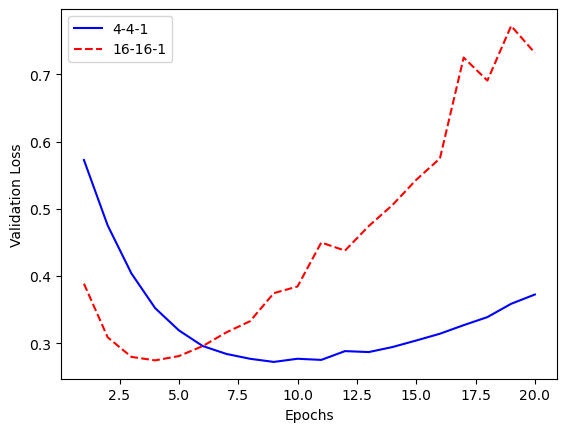

In [10]:
net_a, net_b = '4-4-1', '16-16-1'
plot_loss_comparison(
    loss_a=histories[net_a].history['val_loss'], label_a=net_a, 
    loss_b=histories[net_b].history['val_loss'], label_b=net_b, 
    y_label='Validation Loss'
)

The high capacity network overfits almost at the outset, and more vigorously.

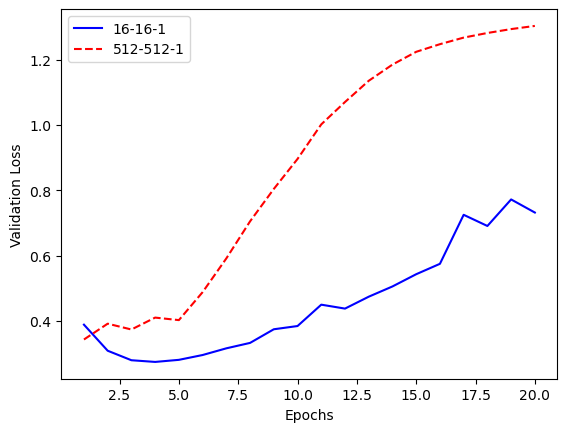

In [11]:
net_a, net_b = '16-16-1', '512-512-1'
plot_loss_comparison(
    loss_a=histories[net_a].history['val_loss'], label_a=net_a, 
    loss_b=histories[net_b].history['val_loss'], label_b=net_b, 
    y_label='Validation Loss'
)

The high capacity network reaches zero training loss earlier than the original network. The high capacity network easily models training data – at the expense of overfitting.

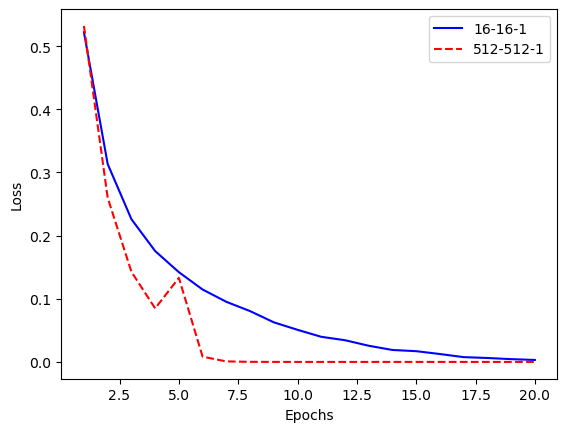

In [12]:
net_a, net_b = '16-16-1', '512-512-1'
plot_loss_comparison(
    loss_a=histories[net_a].history['loss'], label_a=net_a, 
    loss_b=histories[net_b].history['loss'], label_b=net_b, 
    y_label='Loss'
)

### 2. Adding weight regularization

A simple network has low capacity (small number of units) and small weight and bias values.

In analogy with polynomial fits of points, **simple** means low capacity, equivalent to a low degree.

What if we had a way of controlling the capacity in a **continuous, smooth way**?

Weight regularisation is a way to do that.

Parameters are **regular** if they occupy a small interval close to zero:

- large weight parameters will amplify input noise (just like larger coefficients in a polynomial);
- the network will attempt to fit the noise;
- a model with smaller weight will behave like a **lower capacity model**.


*An example: the `tanh` activation is almost linear around zero. With small weights, the network tends to behave like a linear model!*

**Weight regularisation**

- L1: a cost proportional to the absolute value of the weight parameters is added to the loss function;

- L2: as above, but the cost is the square of the weight parameters.

L2 is more often used! It is also known as **weight decay**, explanation by Andrew Ng in the video below.

These regularisation terms are added to the loss function, and **penalise the network if it has large weights**.

TensorFlow Keras weight parameter regularisation is achieved by adding a weight regularizer instance to the layer you are using:

```python
tf.keras.layers.Dense(
    16,
    # ↓ REGULARISATION -------------------------------
    kernel_regularizer=tf.keras.regularizers.l2(0.001),
    activation='relu', 
    input_shape=(10000,)
)
```                         

`l2(0.001)` $0.001 \times \sum(w^T \cdot w)$ is added to the loss function ($0.001 \times \sum|w|$ for `l1(0.001)`).

L1, or a combination, are selected like so: 

```python
    # ↓ ------------------------------------ ↓ L1 ---
    kernel_regularizer=tf.keras.regularizers.l1(0.001),
```  
```python
    kernel_regularizer=(
        # ↓ ----------------- ↓ L1 ---- combined with --------- ↓ L2 ! --
        tf.keras.regularizers.l1(0.001) + tf.keras.regularizers.l2(0.001)
    )
```       
```python
    #                  or, same as the previous one:
    # ↓ -------------- ↓ ----------------- ↓ L1 and L2,
    kernel_regularizer=tf.keras.regularizers.l1_l2(0.001, 0.001)
```     

#### Reference

$$
\bbox[5px,border:2px solid red]
{
\begin{align*}
\mathrm{L1}&: J(w,b) = \frac{1}{m} \sum Loss(y_{pred}, y) + \color{blue}{\frac{\lambda}{m} |w|} \quad (\text{equivalent to} \lVert w \rVert_1)\\
\\
\\
\mathrm{L2}&: J(w,b) = \frac{1}{m} \sum Loss(y_{pred}, y) + \color{blue}{\frac{\lambda}{2m} \lVert w \rVert^2_2}\\
\end{align*}
}
$$


L1 regularisation is also known as [LASSO](https://en.wikipedia.org/wiki/Regularization_(mathematics)#Regularizers_for_sparsity).  

L2 regularisation is also known as [Ridge](https://en.wikipedia.org/wiki/Ridge_regression) (or Tikhonov regularisation).

$J$: final loss over all training examples    
$w$: weights  
$b$: biases  
$y_{pred}$: model predictions  
$y$: true labels  
$|w|$: the absolute value of the elements  
$\lVert w \rVert^2_2$: the sum of the squares of the elements (equivalent to $w^Tw$)  
$\lambda$: the regularisation (hyper)parameter: how strong you wish this regularisation to be...

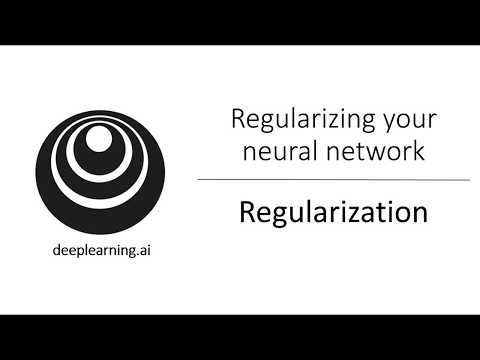

In [2]:
YouTubeVideo('6g0t3Phly2M', width=853, height=480) # Andrew Ng Regularization (C2W1L04)

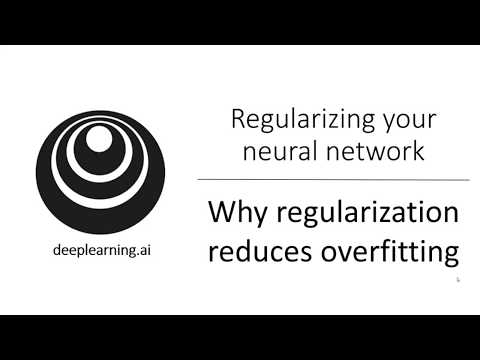

In [4]:
YouTubeVideo('NyG-7nRpsW8', width=853, height=480) # Andrew Ng Why Regularization Reduces Overfitting (C2W1L05)

For those who are interested, a more in-depth & mathematical discussion of regularisation.

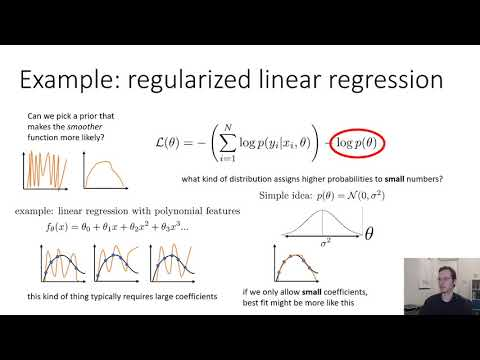

In [5]:
YouTubeVideo('U_cpdaJ-adk', width=853, height=480) # Sergey Levine, UC Berkeley, CS 182 Lecture 3
                                                   # Part 2: Error Analysis

### Modular programming: a model building function with optional regularisation

Let us compare L2 regularisation to the unregularised IMDB network. 


In [13]:
def build_model(layer_1_units, layer_2_units, layer_3_units, reg=True, clear=True):
    if clear:                                               # ↑ REGULARISATION parameter 
        tf.keras.backend.clear_session()
    model = tf.keras.models.Sequential()

    model.add(
        tf.keras.layers.Dense(
            layer_1_units,     # ↓ REGULARISATION (only if reg is True) --------
            kernel_regularizer=tf.keras.regularizers.l2(0.001) if reg else None,
            activation='relu', input_shape=(10000,)
        )
    )

    model.add(
        tf.keras.layers.Dense(
            layer_2_units,     # ↓ REGULARISATION (only if reg is True) --------
            kernel_regularizer=tf.keras.regularizers.l2(0.001) if reg else None,
            activation='relu'
        )
    )

    model.add(tf.keras.layers.Dense(layer_3_units, activation='sigmoid'))
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc']
    )
    return model

In [14]:
model = build_model(16, 16, 1, reg=False) # NO REGULARISATION
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)
del model

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5382 - acc: 0.7799 - val_loss: 0.4394 - val_acc: 0.8144
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3299 - acc: 0.8960 - val_loss: 0.3165 - val_acc: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2351 - acc: 0.9239 - val_loss: 0.2991 - val_acc: 0.8808
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1854 - acc: 0.9400 - val_loss: 0.2794 - val_acc: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1489 - acc: 0.9531 - val_loss: 0.3434 - val_acc: 0.8652
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1244 - acc: 0.9624 - val_loss: 0.2879 - val_acc: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1014 - acc: 0.9699 - val_loss: 0.3118 - val_acc: 0.8807
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0860 - a

In [15]:
l2_model = build_model(16, 16, 1, reg=True) # WITH L2 REGULARISATION
l2_history = l2_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)    
del l2_model

Epoch 1/20
30/30 [==============================] - 4s 65ms/step - loss: 0.5872 - acc: 0.7763 - val_loss: 0.4514 - val_acc: 0.8617
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3717 - acc: 0.8953 - val_loss: 0.3663 - val_acc: 0.8778
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2915 - acc: 0.9193 - val_loss: 0.3488 - val_acc: 0.8793
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2502 - acc: 0.9353 - val_loss: 0.3649 - val_acc: 0.8710
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2262 - acc: 0.9430 - val_loss: 0.3261 - val_acc: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2109 - acc: 0.9473 - val_loss: 0.3414 - val_acc: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1972 - acc: 0.9548 - val_loss: 0.3491 - val_acc: 0.8812
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1896 - a

The L2 regularised model resists (or delays) overfitting even though both networks have the same capacity  
(160'305 learnable parameters).

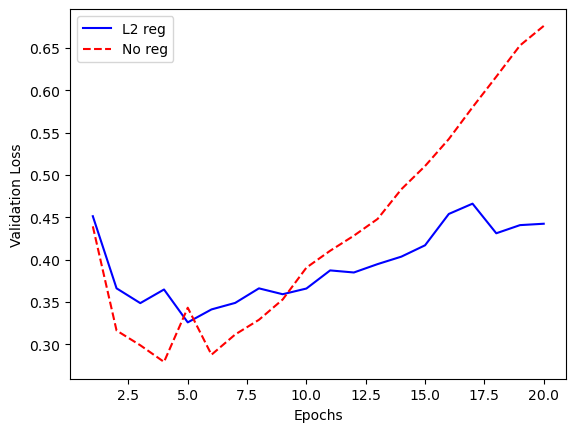

In [17]:
plot_loss_comparison(
    l2_history.history['val_loss'], 'L2 reg',
    history.history['val_loss'], 'No reg', 
    'Validation Loss'
)

### 3. Dropout

Finally, dropout is a common and effective regularisation technique.

A fraction ('the dropout rate') of the output from a dropout layer is zeroed.

<!-- ![Chollet dropout](images/chollet.dropout.png) -->
<img src="https://drive.google.com/uc?id=11iPcIEcL9NiiYPuvVdByskXGT4azKK4-">


<small>DLWP, p.150</small>

<!-- <img style="height:700px" src="images/ng.dropout.1.png"> -->
<img style="height:700px" src="https://drive.google.com/uc?id=1ZtyaNsIvCPRpwRDkckHsAsj3OevLCDTK">

<small>[Andrew Ng, Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization (Course 2 of the Deep Learning Specialization)](https://www.youtube.com/watch?v=D8PJAL-MZv8&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=6)</small>

<!-- <img style="height:700px" src="images/ng.dropout.2.png"> -->
<img  style="height:700px" src="https://drive.google.com/uc?id=1cndX6ECUZBuFfJEPeaPYnnefCY-pnaST">


<small>[Andrew Ng, Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization (Course 2 of the Deep Learning Specialization)](https://www.youtube.com/watch?v=D8PJAL-MZv8&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=6)</small>

<!-- <img style="height:700px" src="images/ng.dropout.3.png"> -->
<img  style="height:700px" src="https://drive.google.com/uc?id=1JaH_tpSSWHHdIMY4oAyVFEKHY0fHViuK">

<small>[Andrew Ng, Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization (Course 2 of the Deep Learning Specialization)](https://www.youtube.com/watch?v=D8PJAL-MZv8&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=6)</small>

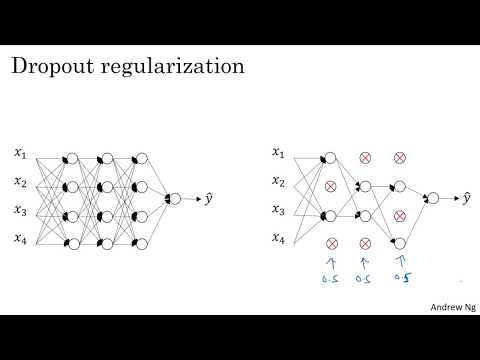

In [6]:
YouTubeVideo('D8PJAL-MZv8', width=853, height=480) # Andrew Ng Dropout Regularization (C2W1L06)

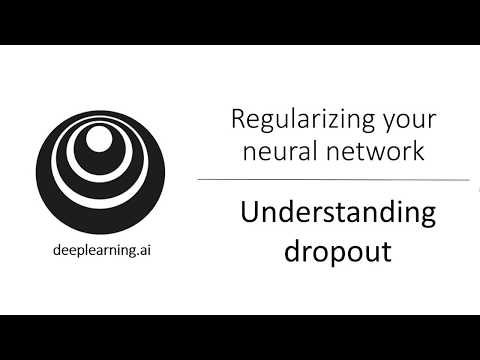

In [7]:
YouTubeVideo('ARq74QuavAo', width=853, height=480) # Andrew Ng Understanding Dropout (C2W1L07)

In [72]:
# dropout rate = 0.5
length = 8
mask = np.random.randint(0, high=2, size=length) # the mask is a vector with, on average,
with np.printoptions():                          # equal numbers of zeros and ones (a rate of 0.5)
    print('mask =', mask) 
    print()

layer_out = np.random.rand(length)

with np.printoptions(linewidth=120):
    # layer output
    print('layer_out        =', layer_out)
 
    # regularised layer output 
    print('mask * layer_out =', mask * layer_out) # dropout is just multiplying the layer output by the mask

mask = [1 1 0 0 0 0 1 1]

layer_out        = [0.26436552 0.562102   0.42606478 0.79646949 0.82150164 0.91663979 0.42289706 0.07775315]
mask * layer_out = [0.26436552 0.562102   0.         0.         0.         0.         0.42289706 0.07775315]


The dropout rate is usually between 0.2 and 0.5.

Dropout is removed while evaluating the final network.

### Note

In order to **keep the expected value** of activations constant between the net with and without dropout, the 
 output activations after activation need to be **scaled up by the dropout rate** to compensate for the parts of the layer output removed by dropout. Indeed, in expectation the output activation of the layer will be reduced by the dropout rate (50% in our case) as 50% of the elements are zeroed out.
 
```python
layer_output *= np.random.random(0, high=2, size=layer_output.shape)
layer_output /= 0.5
```

TensorFlow applies this scaling automatically.

### Modular programming: a model building function with optional 50% dropout.

In [4]:
def build_model(layer_1_units, layer_2_units, layer_3_units, drop, clear=True):
    if clear:                                               # ↑ DROPOUT parameter
        tf.keras.backend.clear_session()
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(layer_1_units, activation='relu', input_shape=(10000,)))
    if drop:                      # ↓ DROPOUT                        # IDEA FOR COURSEWORK: instead of drop being
        model.add(tf.keras.layers.Dropout(0.5))                      # a boolean, how about passing the *rate*,
                                                                     # and only activating the layer if it is > 0 ?
    model.add(tf.keras.layers.Dense(layer_2_units, activation='relu'))        
    if drop:                      # ↓ DROPOUT                        # ALSO: can you find a way to combine layer
        model.add(tf.keras.layers.Dropout(0.5))                      # automation with specifying a dropout rate
                                                                     # for each layer?
    model.add(tf.keras.layers.Dense(layer_3_units, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [11]:
model = build_model(16, 16, 1, drop=False) # training the original network
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
    verbose=0,
    callbacks=[CustomCallback(20)]
)
del model

\ epoch: 20/20


In [13]:
do_model = build_model(16, 16, 1, drop=True) # training a network with dropout
do_history = do_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
    verbose=0, 
    callbacks=[CustomCallback(20)]
)
del do_model

\ epoch: 20/20


The plot show that dropout has successfully reduced overfitting.

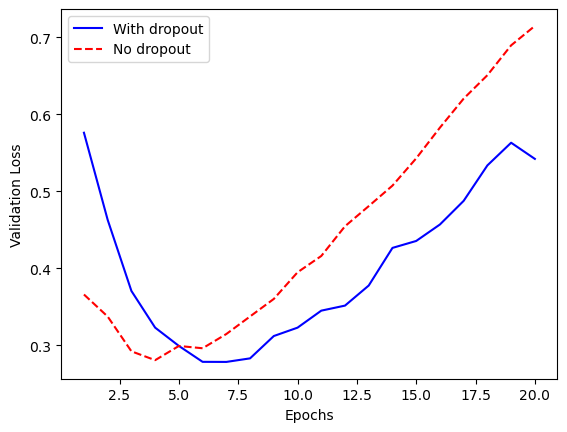

In [15]:
plot_loss_comparison(
    do_history.history['val_loss'], 'With dropout',
    history.history['val_loss'], 'No dropout', 
    'Validation Loss'
)

### An anecdote

Dropout was (re-)discovered by Geoffrey Hinton...

Hinton says: "I went to the bank. The tellers kept changing and I asked one of them why. He said he didn't know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud a bank. This made me realise that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting." (DLWP, 150-1)

<!-- ![Hinton Dropout, Reddit](images/hinton.dropout-reddit.png) -->
![Hinton Dropout, Reddit](https://drive.google.com/uc?id=1FI49yy54dASh0pOIA8DQP8yxwNXNisyJ)

<small>[Hinton on Dropout, Reddit](https://www.reddit.com/r/MachineLearning/comments/4w6tsv/ama_we_are_the_google_brain_team_wed_love_to/)</small>

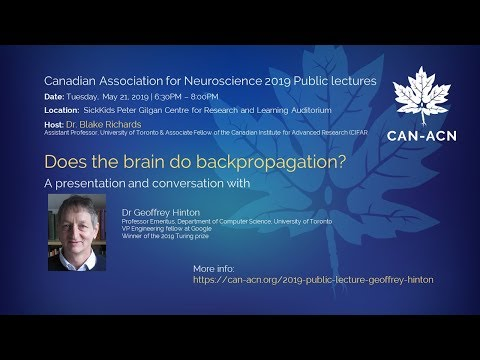

In [8]:
YouTubeVideo('qIEfJ6OBGj8', width=853, height=480, start=4408) # Geoffrey Hinton Does the brain do backpropagation?
                                                               # until 1h17'30''

---

# 6. The universal workflow of machine learning

---

## 6.1 Define the task

## 6.1.1 Frame the problem

What are you trying to predict? 

And is the data (samples and labels) available?

What is the type of the problem? 

Binary classification, single label multiclass, multilabel multiclass, regression? 

Hypotheses

- the outputs can be predicted from the inputs;
- the available data is sufficiently informative.

The hypotheses might not be met even if your problem is well defined.

For example, an attempt to the predict stock prices from the recent past will likely fail because recent prices contain too little predictive information.

## Note on Ethics

This probably should go without saying, but when a project seems fishy, *use your judgement*!

A project to classify people as trustworthy or not on the basis of their portrait is **clearly a non-starter**.

We do encode our own biases in all sort of ways, as individuals and societies, when we build models. Beware claims of **objectivity** and **authority** linked to these technologies.

Technology is not neutral, and has an impact on our societies. It is important to think about these issues and be open about them.

<!-- ![Criminality paper](images/criminality.cnns.png) -->
![Criminality paper](https://drive.google.com/uc?id=15uAeH15mY6r9VWhjys6SnWGeoT2lC34b)

<small>[Xiaolin Wu, Xi Zhang, "Automated Inference on Criminality using Face Images"](https://arxiv.org/abs/1611.04135v1)</small>

<!-- ![Criminality paper](images/criminality.cnns.2.png) -->
![Criminality paper](https://drive.google.com/uc?id=1NJUC9Nr8REbrpZ1DiSgOpWjcSqIqMc6Q)

<small>[Mahdi Hashemi, Margeret Hall, "Criminal tendency detection from facial images and the gender bias effect"](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0282-4)</small>

### Historical example of pseudoscience: phrenology

[Phrenology, Wikipedia](https://en.wikipedia.org/wiki/Phrenology)

<!-- ![Phrenology husband](images/phrenology.husband.jpg) -->
![Phrenology husband](https://drive.google.com/uc?id=1nw0WzA4uyXGdBJf1I8Ul-eqIepdwjULU)


<small>[33 Absurd Phrenology Diagrams From A Century Ago](https://allthatsinteresting.com/phrenology-charts)</small>

<!-- ![Phrenology husband](images/phrenology.wife.jpg) -->
![Phrenology husband](https://drive.google.com/uc?id=1O9MGYa0ktQxyyl4J0KWinhcSwo7Ex-Ob)

<small>[Phrenology, University of Missouri](https://library.missouri.edu/news/special-collections/phrenology)</small>

### References

[Kevin W. Bowyer, Michael King, Walter Scheirer, Kushal Vangara, "The Criminality From Face Illusion"](https://arxiv.org/abs/2006.03895)

### Nonstationariness / Concept drift

Much of the data in the world changes constantly.

Nonstationary problems have a time ordering.

Chollet's example: recommender system, you can't have the same system now as in a few years ago! It could be clothing, music, anything. A good recommendation is time-dependent.

Either gather information from a period when the problem is stationary (a succession of summers) or train the model on recent trends (the past few weeks) or on all data but include the time of year as an input.

A third hypothesis: **the future is like the past**.

The kind of machine learning we study now **only spots patterns in collected data** – data that lies in the past.

We assume, when we use a trained model, that the past is relevant today.

---

## 6.1.2 Collect a dataset

### Beware of non-representative data

You should strive to make sure that your **training data** and the **real world (unseen)** data you're using your model on come from the **same distribution**.

#### Examples

Very clean and well-lit pictures in training, real-world pictures from social media in production, you're in for trouble!

The same goes with text: if your chatbot is trained on very well edited and clean text, there is no way it could then chat with real people using slang, abbreviations, spelling mistakes, etc.

#### The problem of sampling bias

If you based your estimation of who won the election that night just on this one newspaper, you would be wrong!
<!-- <img style="float:right;height:550px" src="images/chollet.sampling-bias.png"> -->
<img  style="float:right;height:550px" src="https://drive.google.com/uc?id=1CnnE3seK1nxxqa17-eoF1-PwIwHad7hg">

<small style="position:absolute;bottom:0;right:0">DLWP, p.184</small>

---

# Keras Callbacks (and other things)

The [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback), [list](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) and [tutorial](https://www.tensorflow.org/guide/keras/custom_callback).

You add one or more callbacks through the `callbacks` argument to `fit/evaluate/predict` in a list:

```python
model.(fit|evaluate|predict)(
    ...
    callbacks=[MyCustomCallback(), MyOtherCustomCallback()]
)
```

conda install -c conda-forge keras-tuner
### Early Stopping

```
tf.keras.callbacks.EarlyStopping
```

([docs](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping))

**What we are doing manually now.** Please refrain from using this in Coursework 1, as the points for identifying the epoch with best performance can only be given if you implement the process yourself!

```python
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # the metric to monitor
    min_delta=0,        # specify a minimum change considered an improvement
    patience=0,         # how many epochs allowed without an improvement
    verbose=0,
    mode='auto',        # do we aim for min or max? (auto: inferred from metric)
    baseline=None,      # specify baseline, training stops if model can't beat it
    restore_best_weights=False
)


### Checkpoints

```python
tf.keras.callbacks.ModelCheckpoint
```

([docs](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint))

To save your network automatically.

```python
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model.keras',       # name and path of the file: format the name 
                                  # to prevent overwriting, e.g.
                                  # f"model.{epoch:02d}-{val_loss:.2f}.keras"
    save_weights_only=False,      # save full model
    monitor='val_accuracy',       # the metric to monitor
    mode='max',                   # do we aim for max or min?
    save_best_only=True           # if False, you can specify
)                                 # `save_freq=n` to save every n epochs
```

### TensorBoard

```python
tf.keras.callbacks.TensorBoard(
    log_dir='logs',      # as above, you can specify the log directory 
    update_freq='epoch', # specific to this particular model
)

```

Many more options in the ([docs](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard))...

Locally, you start training, then open a terminal, activate your environment, then do:
```bash
tensorboard --logdir logs # same logdir as above!
```
The output will give you a local web address (default: ` http://localhost:6006/`) where the interface is accessible.

This is **supposed** to work in Colab, but on the condition that Third-Party Cookies are allowed, etc. It hasn't in the past month for me, see [this](https://github.com/googlecolab/colabtools/issues/3990). Here is [the reference notebook](https://colab.research.google.com/drive/1AWienDOZQuHiJ2mFFXNpqnoZLI1aZ1Fi#scrollTo=NkTyhz9a8SNw)! Also in the zip on the VLE.

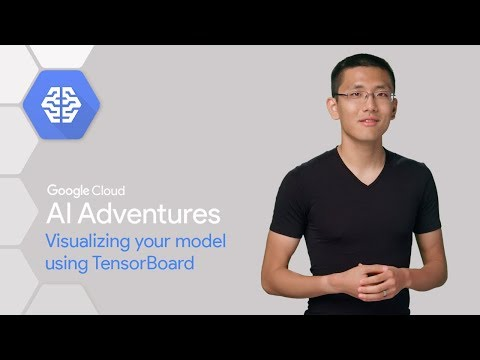

In [3]:
YouTubeVideo('qEQ-_EId-D0', width=853, height=480) # Google Research, Yufeng Guo, Visualizing Your Model Using TensorBoard

### Saving/Loading

The [Save and load Keras models](https://www.tensorflow.org/guide/keras/save_and_serialize) tutorial.


```python
model.save('path/to/location')         # save the full model

model.save_weights('path/to/location') # save only the weights

model = tf.keras.models.load_model('path/to/location')

```

---

# Summary

## Overfitting 

- **More data** is better. (By far the best and most straightforward measure...)

Other techniques:

- **Capacity reduction**
- **Weight regularisation**
- **Dropout**

## Statistical power

We aim for statistical (predictive) power.

- Establish a **baseline** will help you know what to aim for;
- Grow your model until you beat the baseline and **overfit** (often happens straight away);
- **Regularise** your model using various techniques.

*It is informative to know what the **lower capacity limit** is for a particular architecture & problem (the largest network that does not overfit).*

## Workflow

1. **Define** the problem and **collect data** (samples and labels)
2. Choose the **success criterion** (**loss**) and monitoring **metrics**
3. Chose a **validation protocol** (hold-out...)
4. **Prepare your data**
5. Check your **baselines**
5. **Train**  
   a. a first underfitting model (still with statistical power, not a total wreck)  
   b. a larger overfitting model  
7. **Tune**  
   a. **Regularise** the overfitting model  
   b. **Tweak** hyperparameters based on performance on the **validation set**  
8. **Retrain on the entire training set** and evaluate on your **unseen test set**


|Problem type | Last layer activation | Loss function| Metric |
|:---|:---|:---|:---| 
Binary classification | `sigmoid` | `binary_crossentropy`| `accuracy` |
Multiclass, single-label classification | `softmax` | `categorical_crossentropy`| `accuracy` |
Multiclass, multi-label classification | `sigmoid` | `binary_crossentropy` | `categorical_accuracy`|
Regression to arbitrary values | `None` | `mse` | `mae` |
Regression to values in [0, 1] | `sigmoid` | `mse` or `binary_crossentropy` | `mae`|


## Experiments

- Different architectures (number of layers, units per layer)  
- Dropout
- L1/L2 regularisation
- Other hyperparameters...

## Extra: *Seeing* Overfitting

A few graphs using `matplotlib` that show overfitting in action.

In [10]:
num_points = 11
degree = 10
x = np.linspace(0, 10, num_points)
y = x + np.random.random(size=11) - 0.5

p = np.polyfit(x, y, degree)

xx = np.linspace(0, 10, 101)
def fit(xx, degree):
    yy = np.zeros(len(xx))
    for i in range(len(p)):
        yy += xx ** (degree - i) * p[i]
    return yy
yy = fit(xx, degree)

poly_str = ''     
for i in range(degree):
    poly_str += str(p[i]) + 'x^' + str(degree - i) + ' + '
poly_str += str(p[degree])

In [11]:
num_points = 11
degree = 10
x = np.linspace(0, 10, num_points)
y = x + np.random.random(size=11) - 0.5

# https://numpy.org/doc/stable/reference/routines.polynomials.html
p = np.polynomial.Polynomial.fit(x, y, degree)

xx, yy = p.linspace(n=100, domain=[0,10])

Consider the following dataset.

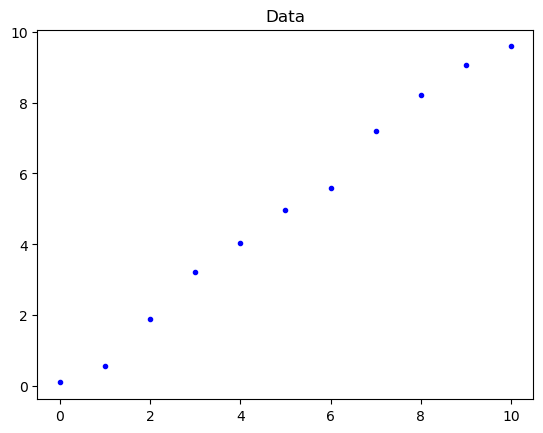

In [12]:
plt.plot(x, y, 'bo')
plt.title('Data')
plt.show()

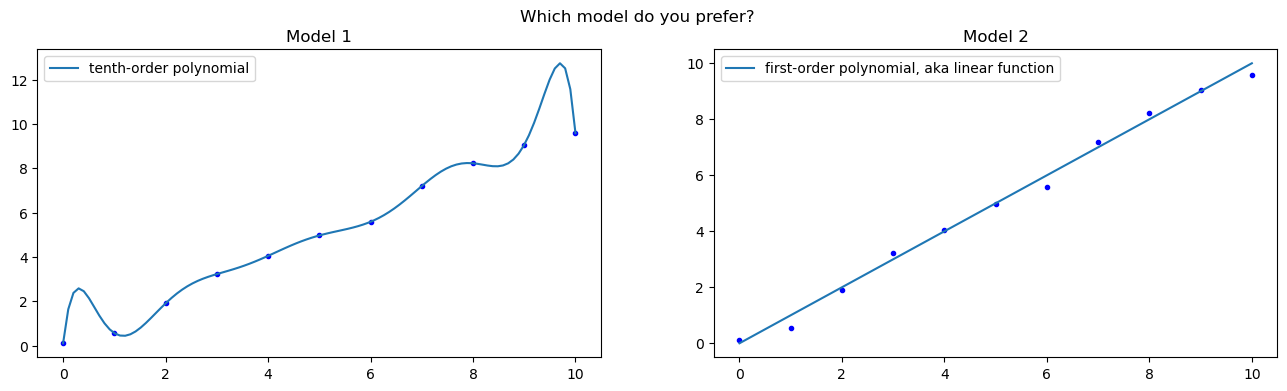

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

fig.suptitle("Which model do you prefer?")
ax1.plot(x, y, 'bo')
ax1.plot(xx, yy, label="tenth-order polynomial")
ax1.set_title('Model 1')
ax1.legend()

ax2.plot(x, y, 'bo')
ax2.plot(x, x, label="first-order polynomial, aka linear function")
ax2.set_title('Model 2')
ax2.legend()
plt.show()

In [22]:
print("Data: y = x + u, u ~ U(-0.5, 0.5)")
print("Model 1:")
print("y = x")
print()
print("Model 2:")
print(f"y =", p)

Data: y = x + u, u ~ U(-0.5, 0.5)
Model 1:
y = x

Model 2:
y = 4.9686829 + 3.17369407·x - 7.68400757·x² + 19.01802378·x³ + 113.57606073·x⁴ - 60.94434165·x⁵ -
444.72121753·x⁶ + 80.87796781·x⁷ + 636.67010207·x⁸ - 37.38658612·x⁹ - 297.96557572·x¹⁰


I expect you prefer Model 2. We prefer simpler models – a principle called **Occam's razor**.

The tenth order polynomial (Model 1) fits our data perfectly, but the fit is too good ("overkill").

Model 1 won't generalise well to new data!

### Occam's razor

"Novacula Occami", aka "lex parsimoniae", the **law of parsimony**.

*Entities are not to be multiplied beyond necessity.*

("Non sunt multiplicanda entia sine necessitate.")([Wikipedia](https://en.wikipedia.org/wiki/Occam%27s_razor))

<img style="float:right;height:400px" src="images/ockham.jpg">

<small style="position:absolute;bottom:0;right:0">[William of Ockham (c.  1287–1347), Wikipedia](https://en.wikipedia.org/wiki/William_of_Ockham) (♡μ_μ)</small>

In other words:

When two explanations for a phenomenon are equal in other respects, **prefer the simpler one**.

In our case: **prefer simpler models**.  
(Models with as little capacity as possible without losing in performance, capacity being the total number of parameters.)

#### Note

The race to build bigger models does not contradict this.

It's happening because an increase in size, so far, it has only improved performance and generalisation! The 'two explanations' (smaller vs bigger models) are not equal.

In [7]:
def distance(x, y, x0, y0):
    """
    Return distance between point
    P[x0,y0] and a curve (x,y)
    """
    d_x = x - x0
    d_y = y - y0
    dis = np.sqrt(d_x**2 + d_y**2)
    return dis

def min_distance(x, y, P, precision=5):
    """
    Compute minimum/a distance/s between
    a point P[x0,y0] and a curve (x,y)
    rounded at `precision`.
    
    ARGS:
        x, y      (array)
        P         (tuple)
        precision (int)
        
    Returns min indexes and distances array.
    """
    # compute distance
    d = distance(x, y, P[0], P[1])
    d = np.round(d, precision)
    # find the minima
    glob_min_idxs = np.argwhere(d==np.min(d)).ravel()
    return glob_min_idxs, d

In [8]:
def noisy_line(x, r=3):
    return x + np.random.random(size=x.shape) * r - r/2 # and adding some noise: y = x + u | u ~ U(-r/2, r/2)

In [9]:
def plot_polynomial(degree, train_x, train_y, test_x, test_y, fn, domain, xlim,ylim):
    
    p = np.polynomial.Polynomial.fit(train_x,train_y, deg=degree)

    xx, yy = p.linspace(n=10000, domain=domain)

    fig, ax = plt.subplots(figsize=(7, 7))

    ax.scatter(train_x, train_y, label="train data")
    ax.scatter(test_x, test_y, marker='x', label="test data")

    ax.plot(xx, fn(xx, r=0), '--k', label="ground truth")
    ax.plot(xx, yy, label="model")

    # error on training set
    train_distances = []
    for t_x, t_y in zip(train_x, train_y):
        min_idxs, dis = min_distance(xx, yy, [t_x, t_y], precision=10)
        for idx in min_idxs:
            ax.plot(
                [t_x, xx[idx]],
                [t_y, yy[idx]],
                '--', lw=1,
                # label=f'train distance {dis[idx]:.2f}'
            )
        train_distances.append(dis[min_idxs[0]]) # only count the min distance once
    train_distances = np.array(train_distances)


    # error on test set
    test_distances = []
    for t_x, t_y in zip(test_x, test_y):
        min_idxs, dis = min_distance(xx, yy, [t_x, t_y], precision=10)
        for idx in min_idxs:
            ax.plot(
                [t_x, xx[idx]],
                [t_y, yy[idx]],
                '--', lw=1,
                # label=f'test distance {dis[idx]:.2f}'
            )
        test_distances.append(dis[min_idxs[0]]) # only count the min distance once
    test_distances = np.array(test_distances)

    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    ax.set_aspect('equal', 'box')
    ax.set(
        xlim=xlim,
        ylim=ylim,
    )
    plt.title(f"Model of degree {degree} | MSE train: {np.abs(train_distances).mean():.4f} | MSE test: {np.abs(test_distances).mean():.4f}")
    plt.grid()
    plt.show()

---

## Overfitting with polynomials

For the following visualisations, code adapted from [here](https://stackoverflow.com/a/67498263).

## Example 1: a line

In [10]:
num_points = 11
train_x = np.linspace(1, 9, num_points)      # creating 11 points on a line,
train_y = noisy_line(train_x)

test_x = np.linspace(0, 11, num_points)      # creating 11 points on a line,
test_y = noisy_line(test_x)

### Good fit

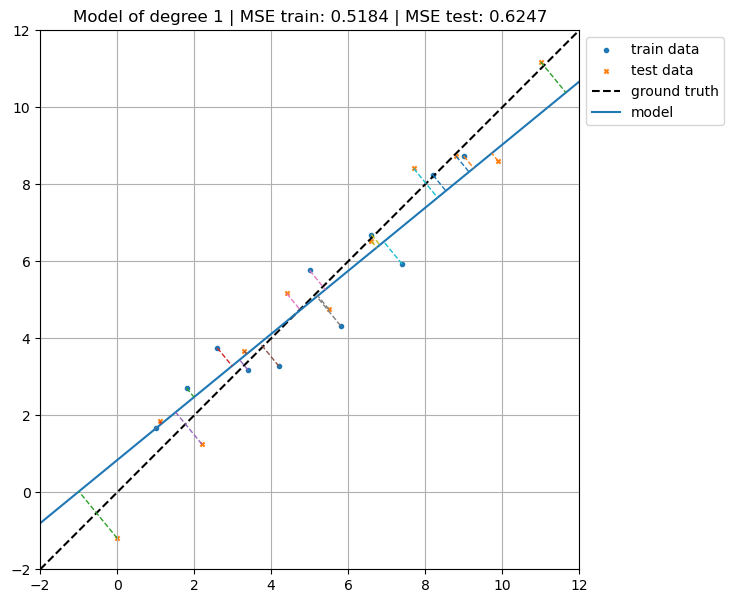

In [11]:
degree = 1
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_line, domain=[-2,12], xlim=[-2,12], ylim=[-2,12])

### Overfitting

Note that the train MSE **improves** while the test MSE **worsens**.

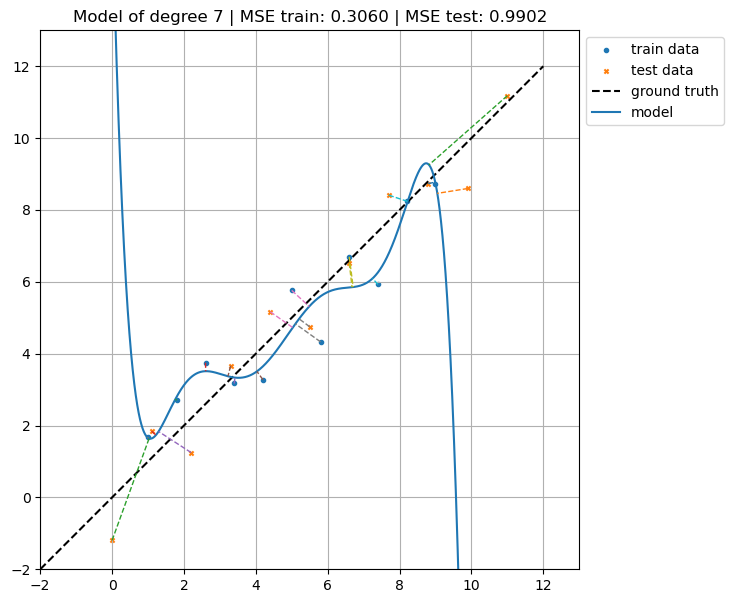

In [12]:
degree = 7
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_line, domain=[-2,12], xlim=[-2,13], ylim=[-2,13])

---

## Example 2: a parabola

In [13]:
def noisy_curve(x, r=.5):
    return (x + np.random.random(size=x.shape) * r - r/2)**2 # and adding some noise: y = (x + u)^2 | u ~ U(-r/2, r/2)

In [14]:
num_points = 10
domain = np.array([-2, 2])

train_x = np.linspace(*domain, num_points)
train_y = noisy_curve(train_x)

test_x = np.linspace(*(domain * 1.5), num_points)    
test_y = noisy_curve(test_x)

## Underfitting

However hard we work to fit a parabola with a line, we would fail. The model doesn't have enough capacity.

Pretty bad MSE on both train and test.

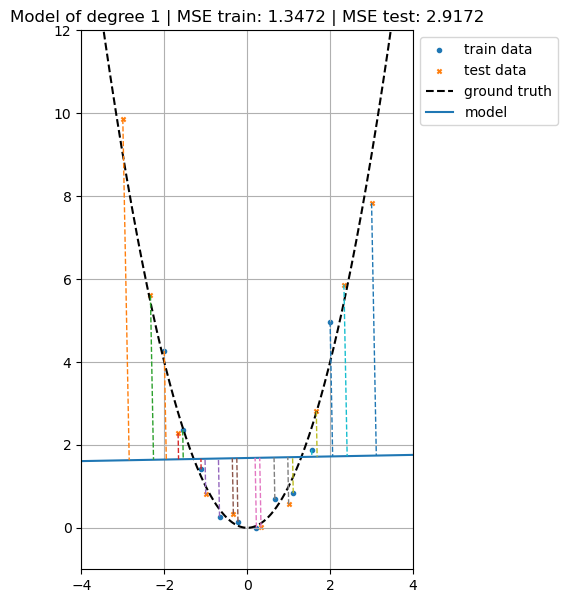

In [15]:
degree = 1
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_curve, domain=[-4, 4], xlim=[-4,4], ylim=[-1, 12])

## Good fit

With a degree 2 we are in business.


Much better MSE on both train and test.

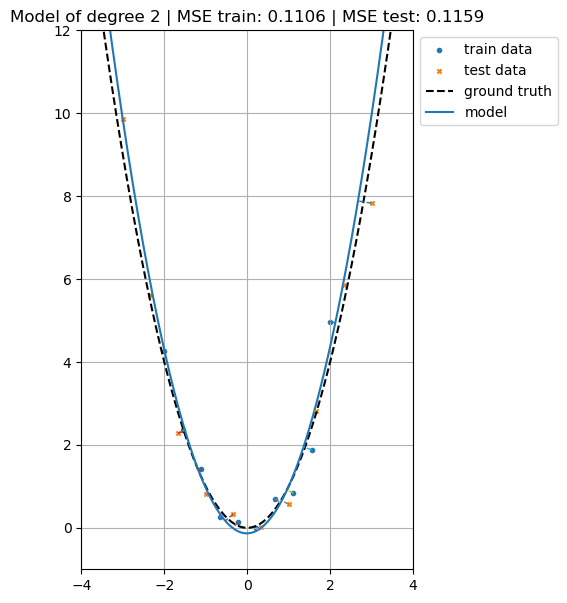

In [16]:
degree = 2
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_curve, domain=[-4, 4], xlim=[-4,4], ylim=[-1, 12])

## Overfitting

With a high degree polynomial we can get really strange results.

The train MSE is **even better** than the good fit while on test we do **worse**!

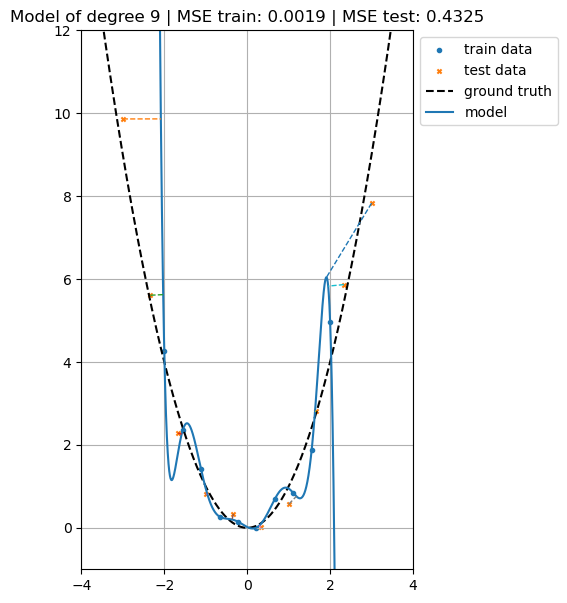

In [17]:
degree = 9
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_curve, domain=[-4, 4], xlim=[-4,4], ylim=[-1, 12])

#### Why is this relevant?

Because **neural networks adapt their complexity during training** to find the best model for their data.

They can be as simple as a linear model, or, in most cases, so complex they fit every single training data point.

#### Double Descent

*Not in the Chollet nor in what you're supposed to know.*

Training on large neural nets has led researchers to come across a phenomenon not described here.

What happens when your neural net is **so complex it can fit all your data points many times over** (*beyond* the overfitting graphs above)?

It seems that the situation with overfitting **actually starts improving again**. 

This is called **Double Descent**. It is an active area of research.

<img style="height:600px" src="images/openai.double-descent.png">

"Neither classical statisticians’ conventional wisdom that *too large models are worse* nor the modern ML paradigm that *bigger models are better uphold*."

"In general, the peak of test error appears systematically when models are just barely able to fit the train set."

["Deep Double Descent", OpenAI blog](https://openai.com/blog/deep-double-descent) 

##### More references

 
[Nakkiran et al, "Deep Double Descent: Where Bigger Models and More Data Hurt", arXiv](https://arxiv.org/abs/1912.02292)  
[Daniella Witten, double descent, Twitter](https://twitter.com/daniela_witten/status/1292293102103748609?t=ipZls3q9Cf8QRZdp54Ug8w&s=19)    
[adad8m, double descent, Twitter](https://twitter.com/adad8m/status/1582231644223987712?t=fQJ3wE-I2Y1wLb8zBCnn3g&s=03)  